In [25]:
import numpy as np
import matplotlib.pyplot as plt

6.1.21

Аналитическое решение

In [18]:
c = [2.2, -4.1, 0.3, -3.4, 3.5, 6.5]
a = 1
b = 1.44
#Integral_value_true = 13.1412
def P(x, c=c):
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x ** 3 + c[4] * x**4

def I(c,x):
    return c[0] * x + c[1] / 2 * x**2 + c[2] / 3 * x**3 + c[3] / 4 * x ** 4 + c[4] / 5 * x**5
i = I(c, b) - I(c, a)
i

-0.204910520320001

Формулы трапеций и Симспона, вычисление погрешностей

In [11]:
n = 1
x = np.linspace(a, b, n+1)
h = x[1] - x[0]
def T(x, h, n, P = P):
    return h*((P(x[0]) + P(x[n]))/2  + np.sum(np.array([P(x[i]) for i in range(1, n)])))

def S(x,h,n):
    return h/6*(P(x[0]) + 4 * np.sum(np.array([P((x[i] + x[i+1])/2) for i in range(0, n)])) + 
                2 * np.sum(np.array([P(x[i]) for i in range(1,n)])) + P(x[n]))
    
it = T(x,h,n)
iS = S(x,h,n)
aet = np.abs(it - i)
aes = np.abs(iS - i)
print(aet, "\n", aes)

0.27423114752000116 
 0.00048100565333453194


Формулы трапеций и Симпсона для составного отрезка интегрирования

In [22]:
h0 = (2*0.0001) / (P(b)*(b-a))
n = round((b-a) / h0)
h0 = (b-a) / n
x0 = np.arange(a, b + h0, h0)
ith0 = T(x0, h0, x0.shape[0] - 1)
aeth0 = np.abs(ith0 - i)
ish0 = S(x0, h0, x0.shape[0] - 1)
aesh0 = np.abs(ish0 - i) 
print(aeth0, "\n", aesh0)

0.00045518406649766585 
 0.0004550945341234014


6.4.7

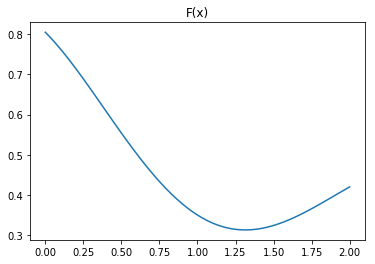

In [30]:
eps = 1e-8
a = 0
b = 2
h_tr = np.sqrt(eps * 12 / 2 /(b - a))

def f(t, x):
    return np.sin(t**2 + x * t)

def t1(func, a, b, x):
    return (b - a ) / 2 * (func(a,x) + func(b,x))

def t2(func, a, b, h, x):
    n = np.linspace(a, b, np.ceil((b-a)/h).astype('int64'))
    s = 0
    for num, i in enumerate(n[:-1]):
        s += t1(func, n[num], n[num + 1], x)
    return s

x = np.linspace(a, b, 100)
y = t2(f, a, b, h_tr, x)
plt.plot(x, y);
plt.title('F(x)');

6.8.7

In [32]:
def t(func, a, b, h):
    n = np.linspace(a, b, np.ceil((b-a)/h).astype('int64'))
    v = t2(func, a, b, h, n)
    return h * ( (v[0] + v[-1]) / 2 + v[1:-1].sum())

sq = t(f, a, b, h_tr)
print(sq)

0.9077075601286632


6.6.21

Формула Гаусса

In [40]:
def G(func, a, b, nodes):
    if nodes == 1:
        t = [0]
        A = [2]
    elif nodes == 2:
        t = [-0.577350269189626, 0.577350269189626]
        A = [1, 1]
    elif nodes == 3:
        t = [-0.77459666929954,0.00000000000000, 0.77459666929954]
        A = [0.55555555555556, 0.88888888888888, 0.55555555555556]
    elif nodes == 4:
        t = [-0.861136311594052, -0.339981043584856,0.339981043584856, 0.861136311594052]
        A = [0.347854845137454, 0.652145154862546, 0.652145154862546,0.347854845137454]
    else:
        return None
    
    s = 0
    for i in range(len(t)):
        s += A[i] * func((b + a) / 2 + (b - a) / 2 * t[i])
    s *= (b-a) / 2
    return s

Вычисление погрешностей

In [53]:
eg = []
sqe = G(P,1,1.44,4)
for i in range(1, 5):
    sqg = G(P, 1, 1.44, i)
    print(sqg)
    eg.append(np.abs(sqg - sqe))
print(eg)

-0.3413045855999998
-0.2052311907555555
-0.2049105202994448
-0.20491052032000012
[0.1363940652799997, 0.0003206704355553647, 2.0555335211724923e-11, 0.0]


6.9.21